In [1]:
import os,librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd
import seaborn as sns

In [2]:
seed=15
n_MFCC=13
column_names= ['MFCC_'+str(i) for i in range(1,n_MFCC+1)]

In [3]:
DATA_PATH="./Vowel_Data/Vowel/"

In [4]:
def get_mfcc(file_path):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    mfcc_df=pd.DataFrame(mfcc.T,columns=column_names) #convert array to pandas df
    return mfcc_df

def get_all_mfcc(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    all_mfcc=pd.DataFrame() #empty dataframe to store all_mfccs
    
    for label_index,label in enumerate(labels):
        folder_mfcc=pd.DataFrame() #empty dataframe to store mfcc of indivuals vowels/words i.e. folders

        speech_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(speech_files,"Reading Speech of label -'{}'".format(label)):
            print(file)
            individual_mfcc=get_mfcc(file_path=file)
            folder_mfcc=folder_mfcc.append(individual_mfcc,ignore_index=True)
        
        folder_mfcc['label']=label_index  #new columns for encoding label
        
        all_mfcc=all_mfcc.append(folder_mfcc,ignore_index=True)
        
    return all_mfcc

def get_train_test(split_ratio=0.8,random_state=42):
    all_mfccs=get_all_mfcc()
    
    X=all_mfccs.drop(labels=['label'],axis=1).values
    y=all_mfccs['label'].values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [ ]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [37]:
np.random.seed(seed)
model_v=Sequential()
#model_v.add(Dense(128, activation='relu', input_shape=(6,)))
#model_v.add(Dense(64, activation='relu'))
model_v.add(Dense(32, activation='tanh',input_shape=(X_train.shape[1],)))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [38]:
model_v.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [39]:
history_v=model_v.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1/1 [==============================] - 0s 440ms/step - loss: 2.1301 - accuracy: 0.1378 - auc: 0.5196 - val_loss: 2.0171 - val_accuracy: 0.1405 - val_auc: 0.5276
Epoch 2/50
1/1 [==============================] - 0s 86ms/step - loss: 2.0197 - accuracy: 0.1412 - auc: 0.5266 - val_loss: 1.9685 - val_accuracy: 0.2411 - val_auc: 0.5642
Epoch 3/50
1/1 [==============================] - 0s 77ms/step - loss: 1.9708 - accuracy: 0.2388 - auc: 0.5616 - val_loss: 1.9364 - val_accuracy: 0.2311 - val_auc: 0.5846
Epoch 4/50
1/1 [==============================] - 0s 82ms/step - loss: 1.9383 - accuracy: 0.2358 - auc: 0.5820 - val_loss: 1.8944 - val_accuracy: 0.2358 - val_auc: 0.6071
Epoch 5/50
1/1 [==============================] - 0s 110ms/step - loss: 1.8982 - accuracy: 0.2312 - auc: 0.6027 - val_loss: 1.8541 - val_accuracy: 0.2663 - val_auc: 0.6560
Epoch 6/50
1/1 [==============================] - 0s 89ms/step

In [40]:
history_dict=history_v.history

loss_v=history_dict['loss']
val_loss_v=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_v=history_dict['accuracy']
val_acc_v=history_dict['val_accuracy']

auc_v=history_dict['auc']
val_auc_v=history_dict['val_auc']

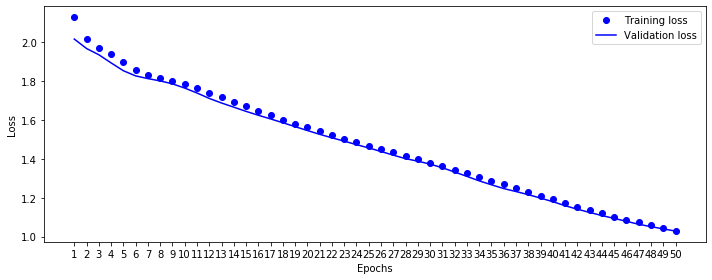

In [73]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'bo',label='Training loss')
plt.plot(epochs,val_loss_v,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

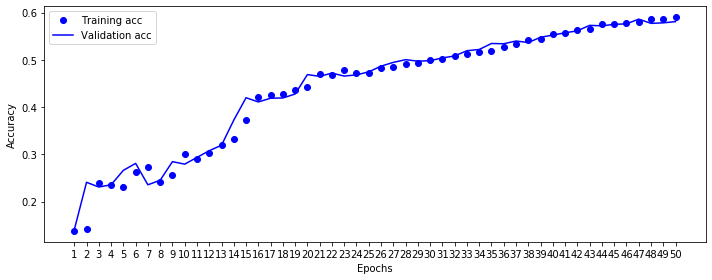

In [72]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'bo',label='Training acc')
plt.plot(epochs,val_acc_v,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

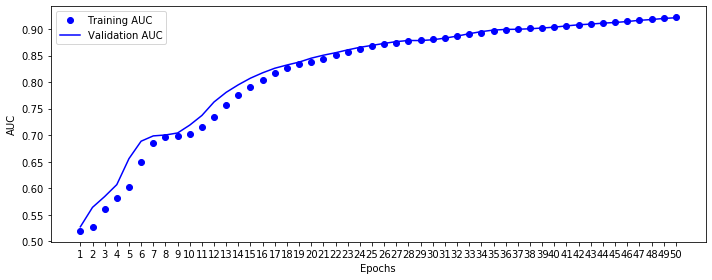

In [71]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'bo',label='Training AUC')
plt.plot(epochs,val_auc_v,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

In [45]:
DATA_PATH="./Word_Data/Word/"

In [46]:
def get_mfcc(file_path):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    mfcc_df=pd.DataFrame(mfcc.T,columns=column_names) #convert array to pandas df
    return mfcc_df

def get_all_mfcc(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_mfcc=pd.DataFrame() #empty dataframe to store all_mfccs
    
    for label_index,label in enumerate(labels):
        folder_mfcc=pd.DataFrame() #empty dataframe to store mfcc of indivuals vowels/words i.e. folders

        speech_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(speech_files,"Reading Speech of label -'{}'".format(label)):
            print(file)
            individual_mfcc=get_mfcc(file_path=file)
            folder_mfcc=folder_mfcc.append(individual_mfcc,ignore_index=True)
        
        folder_mfcc['label']=label_index  #new columns for encoding label
        
        all_mfcc=all_mfcc.append(folder_mfcc,ignore_index=True)
        
    return all_mfcc

def get_train_test(split_ratio=0.8,random_state=42):
    all_mfccs=get_all_mfcc()
    
    X=all_mfccs.drop(labels=['label'],axis=1).values
    y=all_mfccs['label'].values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [ ]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [49]:
np.random.seed(seed
              )
model_w=Sequential()
#model_w.add(Dense(128, activation='tanh', input_shape=(6,)))
#model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh',input_shape=(X_train.shape[1],)))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [50]:
model_w.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [ ]:
history_w=model_w.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

In [52]:
history_dict=history_w.history
loss_w=history_dict['loss']
val_loss_w=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_w=history_dict['accuracy']
val_acc_w=history_dict['val_accuracy']

auc_w=history_dict['auc']
val_auc_w=history_dict['val_auc']

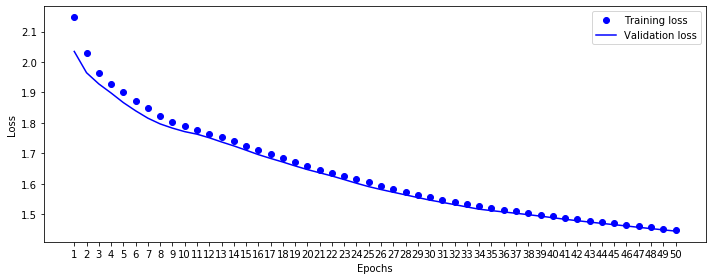

In [70]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_w,'bo',label='Training loss')
plt.plot(epochs,val_loss_w,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_word_'+save_specifier+'.svg',format='svg', dpi=600)

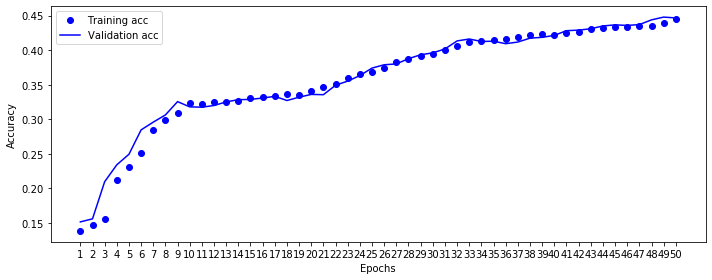

In [69]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_w,'bo',label='Training acc')
plt.plot(epochs,val_acc_w,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_word_'+save_specifier+'.svg',format='svg', dpi=600)

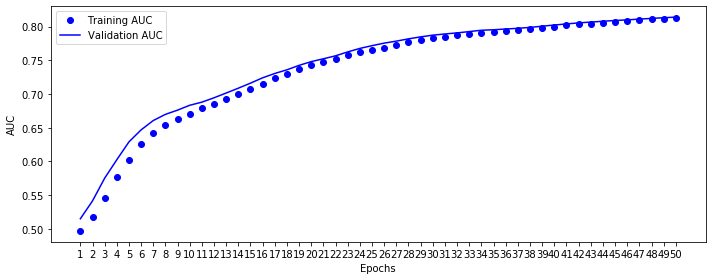

In [68]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_w,'bo',label='Training AUC')
plt.plot(epochs,val_auc_w,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_word_'+save_specifier+'.svg',format='svg', dpi=600)

In [57]:
#COMPARE

In [58]:
epochs=range(1,len(loss_v)+1)

In [62]:
save_specifier='mfcc_32_16_tanh_softmax_adam_0.005_batchfull'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


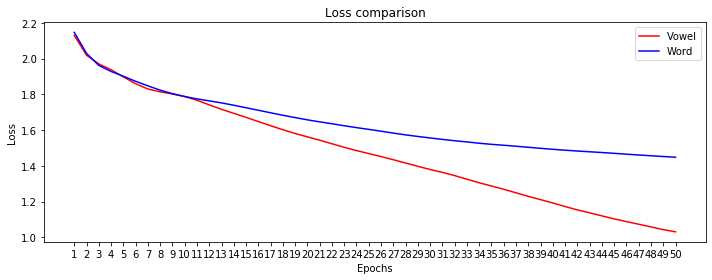

In [63]:
#sns.reset()
#sns.reset_orig()
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'r',label='Vowel')
plt.plot(epochs,loss_w,'b',label='Word')
plt.title('Loss comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_compare_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/loss_compare_'+save_specifier+'.eps',format='eps',dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


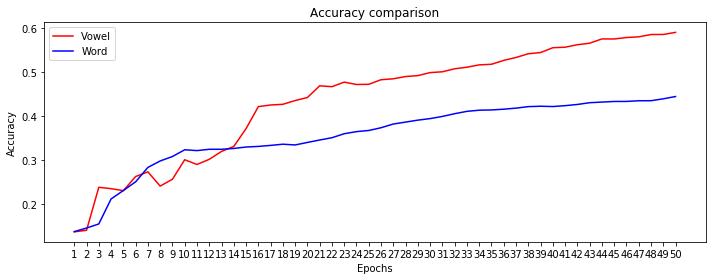

In [64]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'r',label='Vowel')
plt.plot(epochs,acc_w,'b',label='Word')
plt.title('Accuracy comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_compare_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/accuracy_compare_'+save_specifier+'.eps',format='eps',dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


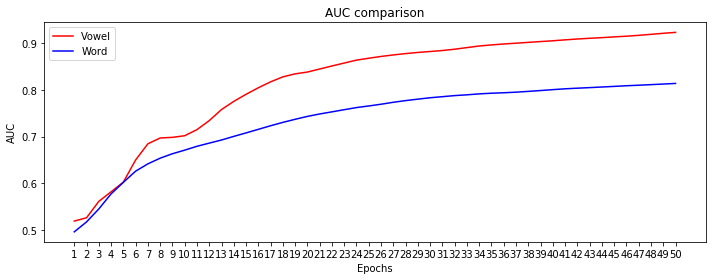

In [65]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'r',label='Vowel')
plt.plot(epochs,auc_w,'b',label='Word')
plt.title('AUC comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_compare_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/AUC_compare_'+save_specifier+'.eps',format='eps',dpi=600)

In [66]:
all_compare_df=pd.DataFrame({'loss_v':loss_v,
                      'val_loss_v':val_loss_v,
                      'acc_v':acc_v,
                      'val_acc_v':val_acc_v,
                      'auc_v':auc_v,
                      'val_auc_v':val_auc_v,
                      'loss_w':loss_w,
                      'val_loss_w':val_loss_w,
                      'acc_w':acc_w,
                      'val_acc_w':val_acc_w,
                      'auc_w':auc_w,
                      'val_auc_w':val_auc_w
                     })

all_compare_df.to_csv('./Result/New_without_CNN/all_compare_data_'+save_specifier+'.csv')

In [67]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.087982,1.079178,0.578892,0.576316,0.914252,0.914130,1.465496,1.461363,0.433841,0.435846,0.808475,0.810116
46,1.073246,1.063786,0.580471,0.586316,0.916134,0.916380,1.460930,1.456924,0.435345,0.437049,0.809607,0.811218
47,1.058198,1.051638,0.585735,0.577368,0.918239,0.917834,1.456578,1.452782,0.435445,0.443865,0.810850,0.812264
48,1.043170,1.040124,0.585867,0.578421,0.920454,0.919898,1.452407,1.448659,0.439755,0.447875,0.812117,0.813237
49,1.030735,1.028717,0.590604,0.581053,0.922445,0.921268,1.448298,1.444540,0.444968,0.446672,0.813397,0.814203
